# Computer Vision Masterclass - Style Transfer

- Based on https://www.tensorflow.org/tutorials/generative/style_transfer?hl=en
- Style transfer paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf

In [ ]:
# 스타일 전이
# 신경망으로 2개의 이미지를 보내서 몇가지 변경을 진행한 뒤 취합하는 것.
# VGG19라는 특정 합성곱 신경망 아키텍처를 사용.
# 이미지 내용과 관련된 층이 있고 이미지 스타일과 관련된 층이 있음.
# 이미지넷 데이터셋의 천개의 객체를 분류하도록 학습되었음.
# 자세한 신경망 구성은 강의 참조.

## Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.17.1'

## Loading the pre-trained convolutional neural network (VGG19)


In [ ]:
network = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
# VGG19 신경망 구조를 살펴보기 위해 이 코드를 실행.
# include_top=False -> 객체 분류에 사용되는 밀집층은 로드하지 않음.
# 오직 합성곱층과 맥스 풀링층만 추출. 객체 1000개를 분류하는 것이 아니기 때문.
# weights='imagenet' -> 이미지넷 데이터셋 사용.

In [ ]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(network.layers)

22

## Loading and pre-processing the images

### Content image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
content_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Computer Vision/Images/chaves.jpeg')

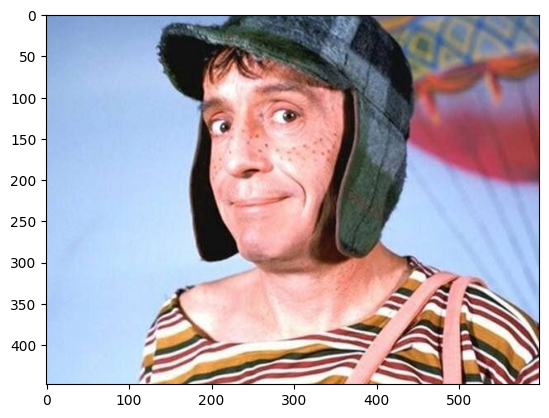

In [ ]:
plt.imshow(content_image);  # 이미지 콘텐츠

In [ ]:
type(content_image)
# 텐서플로에서 작업하기 위해 PIL을 넘파이로 변환해야 함.

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [ ]:
type(content_image), content_image.shape, content_image.min(),content_image.max()

(numpy.ndarray, (448, 598, 3), 0.0, 255.0)

In [ ]:
content_image = content_image / 255

In [ ]:
content_image.min(),content_image.max()

(0.0, 1.0)

In [ ]:
content_image # 3차원인 이유는 3개의 채널이 있기 때문.

array([[[0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        ...,
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ]],

       [[0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        ...,
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434]],

       [[0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        ...,
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ]],

       ...,

       [[0.7294118 , 0.8627451 , 1.        ],
        [0.7254902 , 0.85882354, 1.        ],
        [0.7254902 , 0

In [ ]:
# 신경망에 보내기 위해 배치 형식으로 변환
content_image = content_image[tf.newaxis, :]

In [ ]:
content_image.shape

(1, 448, 598, 3)

### Style image

In [ ]:
style_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Computer Vision/Images/tarsila_amaral.jpg')

# HomeWork
# style_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Computer Vision/Images/vangogh.jpg')

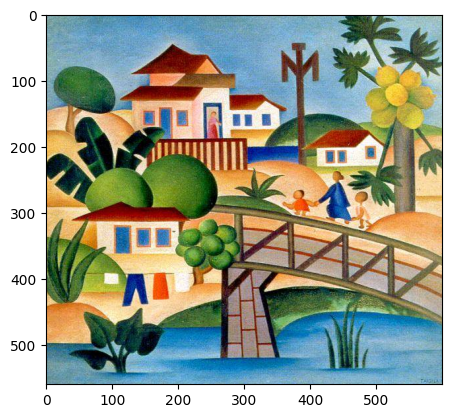

In [ ]:
plt.imshow(style_image);  # 이미지 스타일
# 이 이미지의 스타일로 위의 이미지를 변환할 것임.

In [ ]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)
style_image = style_image / 255
style_image = style_image[tf.newaxis, :]
style_image.shape # shape는 이미지 콘텐츠와 비슷해야 오래 걸리지 않음.

(1, 560, 600, 3)

## Building the neural network

In [ ]:
# VGG19는 1개의 콘텐츠 층과 5개의 스타일 층이 있음.
content_layers = ['block4_conv2'] # 주요 콘텐츠를 추출할 때 사용되는 층.
style_layers = ['block1_conv1', 'block2_conv1','block3_conv1','block4_conv1','block5_conv1']

In [ ]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)
print(num_content_layers, num_style_layers)

1 5


In [ ]:
network.get_layer('block1_conv1').output
# 64개의 필터가 이 층에 사용된 것을 알 수 있음.

<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_1>

In [ ]:
# 각 출력층의 값 또는 활성화 값을 출력하는 함수
def vgg_layers(layer_names):
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False # 이 신경망을 학습시키지 않을 것을 의미. 이미 로드된 가중치를 사용함.

    outputs = [vgg.get_layer(name).output for name in layer_names]
    network = tf.keras.Model(inputs=[vgg.input], outputs=outputs) # inputs=[vgg.input] -> 입력으로 이미지를 보냄

    return network

In [ ]:
style_extractor = vgg_layers(style_layers)

In [ ]:
style_extractor.summary() # vgg합성곱 신경망의 구조는 같음. 차이는 출력값이 5개라는 점.

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [ ]:
style_extractor.outputs # 5개의 층이 반환됨.

[<KerasTensor shape=(None, None, None, 64), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, None, None, 128), dtype=float32, sparse=False, name=keras_tensor_26>,
 <KerasTensor shape=(None, None, None, 256), dtype=float32, sparse=False, name=keras_tensor_29>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_34>,
 <KerasTensor shape=(None, None, None, 512), dtype=float32, sparse=False, name=keras_tensor_39>]

In [ ]:
style_outputs = style_extractor(style_image)
# 결과로 각 층의 활성화 값을 얻음.
# 여기서의 출력값 = 활성화값 = relu 활성화 함수 적용값

In [ ]:
len(style_outputs)

5

In [ ]:
style_outputs[0] # 첫번째 층의 활성화 값

<tf.Tensor: shape=(1, 560, 600, 64), dtype=float32, numpy=
array([[[[0.0000000e+00, 1.0877684e-01, 6.1876804e-02, ...,
          4.7548777e-01, 4.9462211e-01, 1.5644577e-01],
         [0.0000000e+00, 2.0908591e-01, 3.7850654e-01, ...,
          1.7786789e-01, 1.4868840e+00, 1.1423519e+00],
         [0.0000000e+00, 2.0027554e-01, 3.8594386e-01, ...,
          1.3720292e-01, 1.5296973e+00, 1.1784816e+00],
         ...,
         [0.0000000e+00, 3.3374473e-01, 5.1606625e-01, ...,
          0.0000000e+00, 1.6996144e+00, 1.3344206e+00],
         [0.0000000e+00, 3.4465256e-01, 5.2247041e-01, ...,
          0.0000000e+00, 1.7055957e+00, 1.3397942e+00],
         [7.8262198e-01, 4.2381793e-01, 7.7576435e-01, ...,
          4.4776672e-01, 2.4687252e+00, 2.3798752e+00]],

        [[0.0000000e+00, 1.1056373e-01, 0.0000000e+00, ...,
          8.2489133e-02, 0.0000000e+00, 0.0000000e+00],
         [6.3421273e-01, 2.3642045e-01, 3.5782573e-01, ...,
          0.0000000e+00, 5.8060557e-01, 7.0158607e-01

In [ ]:
style_outputs[0].shape  # (560, 600) -> 이미지 크기, 64 -> 필터 개수

TensorShape([1, 560, 600, 64])

In [ ]:
style_outputs[0].shape, style_outputs[1].shape, style_outputs[2].shape, style_outputs[3].shape

(TensorShape([1, 560, 600, 64]),
 TensorShape([1, 280, 300, 128]),
 TensorShape([1, 140, 150, 256]),
 TensorShape([1, 70, 75, 512]))

In [ ]:
# 이 스타일을 하나의 이미지에서 다른 이미지로 전이하기 위해서는
# Gram Matrix라고 하는 측정값을 계산하여 생성된 이미지와 스타일 이미지 사이의 손실을 결정해야 함.
# 이 기법을 개발한 연구원들에 따르면, 이 기법은 한 이미지에서 다른 이미지로 스타일을 전이시킬 때 사용함.
# 계산한 이 측정값은 생성된 이미지와 스타일 이미지 간 손실을 측정할 때 사용함.
def gram_matrix(layer_activation): # 스타일 전이를 위해 사용. 층의 활성화 값을 매개변수로 받음
    result = tf.linalg.einsum('bijc,bijd->bcd', layer_activation, layer_activation)
    # 텐서 축소라는 기법을 적용. 활성화 값을 전송하면 몇가지 수학적 연산 후 값의 차원을 축소 또는 감소시킴.
    # bijc,bijd -> 두 행렬을 곱한다는 의미. 그 결과로  bcd를 가짐.
    # 자세한 정보는 원본 코드의 링크 참조. 식을 저렇게 한 이유는 이 강의의 코드가 텐서플로 문서 기반이기 때문. 그 문서에서 발췌한 것.
    # layer_activation, layer_activation -> 지정한 연산이 단일층에 대해 수행됨.

    # 이제 출력층 각각에 Gram Matrix 함수를 적용해보자
    input_shape = tf.shape(layer_activation)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32) # 이미지 픽셀 크기(float로 변환해서..)

    return result / num_locations  # 정규화된 값을 반환. 각 층마다 픽셀 크기가 다르기 때문.

In [ ]:
gram_matrix(style_outputs[0])
# shape=(1, 64, 64) -> 새로운 shape가 나옴.
# tf.linalg.einsum()에서 텐서 축소 작업을 수행했기 때문. -> 차원이 감소함.

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.63098735, 0.28931642, 0.2851602 , ..., 0.10537568,
         0.369587  , 0.45012608],
        [0.28931642, 0.24121156, 0.18381073, ..., 0.03157694,
         0.19594139, 0.21715762],
        [0.2851602 , 0.18381073, 0.16743274, ..., 0.02779872,
         0.19410352, 0.22709455],
        ...,
        [0.10537568, 0.03157694, 0.02779872, ..., 0.08297461,
         0.06948002, 0.06642947],
        [0.369587  , 0.19594139, 0.19410352, ..., 0.06948002,
         0.28682625, 0.3185408 ],
        [0.45012608, 0.21715762, 0.22709455, ..., 0.06642947,
         0.3185408 , 0.37468514]]], dtype=float32)>

In [ ]:
class StyleContentModel(tf.keras.models.Model): # 이 클래스는 텐서플로 Model 클래스 기반.
    def __init__(self, style_layers, content_layers):
        super().__init__() # 이 Model 클래스의 생성자를 호출하는 것과 같음.
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False # 신경망 학습 수행 안함. 이미 ImageNet으로 학습된 가중치를 사용.

    def call(self, inputs): # inputs은 신경망의 입력값. 여기에 이미지 또는 콘텐츠 이미지(0~1로 정규화된 원본)를 넣어줌
        inputs = inputs * 255.0 # 비정규화
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs) # 정규화 전 기존 입력값을 넣어줌.
        # preprocess_input() -> 전처리를 수행해서 이미지가 vgg19 모델로 전달될 수 있도록 함.
        # 이 함수는 값을 -127.50 ~ 127.50 범위로 정규화 함. vgg19 신경망에 적용된 정규화 작업.

        outputs = self.vgg(preprocessed_input) # __init__()에서 생성된 vgg 신경망.
        # 위에서 style_extractor로 style_outputs를 얻어낸 것과 동일한 과정.
        # 이 outputs에는 각각의 5개 층에 대한 활성화 값이 있음.
        style_outputs = outputs[:self.num_style_layers]
        content_outputs = outputs[self.num_style_layers:]

        # style_output 각각에 gram matrix 적용
        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

        # {층의 이름: 활성화값}
        content_dict = {content_name: value for content_name, value in zip(self.content_layers, content_outputs)}
        style_dict = {style_name: value for style_name, value in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

In [ ]:
style_layers, content_layers

(['block1_conv1',
  'block2_conv1',
  'block3_conv1',
  'block4_conv1',
  'block5_conv1'],
 ['block4_conv2'])

In [ ]:
extractor = StyleContentModel(style_layers, content_layers)

In [ ]:
results = extractor(content_image)

In [ ]:
results # 콘텐츠 이미지에 대한 모든 활성화 값

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 56, 74, 512), dtype=float32, numpy=
  array([[[[  17.335062,    0.      ,    0.      , ...,  574.6945  ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  291.7385  ,
             132.49113 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  333.4566  ,
             117.72036 ,    0.      ],
           ...,
           [ 692.7542  ,    0.      ,    0.      , ..., 1512.0809  ,
              10.164205,  321.67062 ],
           [ 139.49522 ,    0.      ,    0.      , ..., 1108.5734  ,
             102.293434,  179.42436 ],
           [ 152.06625 ,    0.      ,    0.      , ...,  471.31998 ,
             179.42247 ,  671.0473  ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  548.79663 ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,   43.474037,
               0.      ,    0.      ],
           [   0.      ,    0

In [ ]:
for key, value in results.items():
    print(key, value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [ ]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']
# 매개변수로 각각 원본 이미지를 넣어줌.
# 학습 과정 중 생성된 이미지나 콘텐츠와 스타일을 결합한 새로운 이미지를
# style_targets, content_targets과 비교하여 원본 이미지에 대한 콘텐츠 손실을 최소화하기 때문.
# 또한 원본 스타일 이미지에 대한 스타일 손실도 최소화 할 필요가 있음.
# 즉, style_targets, content_targets가 각각 원본 스타일과 원본 콘텐츠가 되며
# 새롭게 생성되는 이미지와 비교할 것임.

In [ ]:
len(style_targets), len(content_targets) # 각각 5개 스타일 층, 1개의 콘텐츠 층 에 대한 출력값이 있음.

(5, 1)

In [ ]:
new_image = tf.Variable(content_image)
# 콘텐트 이미지를 새로운 변수로 정의함으로써 신경망 학습에 따라 새롭게 변경시킬 수 있음.
# 이 변수가 알고리즘의 최종 결괏값이 될 것임.

In [ ]:
content_weight = 1 # 최종 결괏값으로 희망하는 콘텐츠 유닛 수
style_weight = 1000 # 최종 결괏값으로 희망하는 스타일 유닛 수
# 원하는 결괏값에 따라 해당 매개변수를 특정할 수 있음.
# 콘텐츠의 가중치가 클수록 원본 이미지 콘텐츠 보존이 증가함.
# 스타일의 가중치가 클수록 원본 이미지에 대한 스타일의 적용이 많아짐.
# 1000단위의 스타일에 1개의 콘텐츠가 있음.

In [ ]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)
# 학습률은 텐서플로 공식 문서에 나온 수치를 기반으로 정했음.
# 학습률이 클수록 신경망이 이미지에 스타일을 추가하는 속도가 빨라짐.

## Training

In [ ]:
epochs = 5000
print_every = 500 # 500 에포크마다 부분 결과 출력

for epoch in range(epochs):
    # 기존의 신경망에서는 주로 가중치를 업데이트. but 이건 원본 이미지 변경이 목표
    # 이미지의 픽셀을 업데이트 해야함. 그래서 그래디언트로 다음 픽셀 값을 정의할 수 있음.
    # ex. 픽셀값이 10이면 11로 변경해야 하는지 9로 변경해야 하는지를 그래디언트로 알 수 있음.
    with tf.GradientTape() as tape: # 픽셀값 조정을 위한 그래디언트 정보
        # StyleContentModel 클래스 객체(extractor) 사용
        outputs = extractor(new_image) # new_image -> 콘텐트 이미지를 기반으로 생성한 새 이미지

        content_outputs = outputs['content']
        style_outputs = outputs['style']

        # 손실과 오류 계산(콘텐츠는 이미지를 나타내고, 스타일은 이미지의 심미적인 부분임)
        # 집 그림이 콘텐츠를 손실하면 더는 집을 나타내지 않음.
        # 집 그림이 스타일을 손실하면 더는 그림이 아니라 사진에 가깝게 됨.
        # 따라서 화가의 스타일을 그림에 넣으려면 일정 부분의 콘텐츠 손실은 불가피.
        # 하지만 이는 스타일의 혼합으로 어느정도 메꿀 수 있음.
        # 평균 제곱 오차를 사용
        content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()]) # 원본 이미지에서 얼마나 많은 콘텐츠를 손실했는가?
        style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()]) # 원본 이미지에서 얼마나 많은 스타일을 손실했는가?

        # 콘텐츠와 스타일의 가중치를 기반으로 가중치 합 구현.
        total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers # / num_content_layers , / num_style_layers -> 데이터를 정규화

    gradient = tape.gradient(total_loss, new_image) # total_loss 기반으로 그래디언트 계산. 그래서 total_loss를 최적화하거나 new_image 픽셀에 따라 이 손실값을 최소화 해야함.
    # tape.gradient() -> 픽셀 업데이트에 관한 방향을 알 수 있음.
    optimizer.apply_gradients([(gradient, new_image)]) # 이미지 업데이트(픽셀 변경)

    new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0)) # 새 이미지에 엑세스(+픽셀 범위를 정함)
    # apply_gradients()를 실행하면 픽셀이 변경될 수도 있고, 0~1사이의 값을 벗어날 수도 있기 때문.
    # 따라서 0.0, 1.0로 값을 0~1로 고정함.

    if (epochs + 1) % print_every == 0:
        print('Epoch {} | content loss {} | style loss {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
        plt.imshow(tf.squeeze(new_image, axis=0)) # 첫번째 차원(배치 차원) 제거
        plt.show()

# 첫 에포크일때는 아무것도 변경하지 않은 원본 이미지이므로 컨텐츠 손실은 0
# 에포크를 거듭할 수록 콘텐츠 손실은 증가함. = 기존 이미지의 핵심 콘텐츠를 손실한다는 것.
# 그러나 스타일 손실은 매우 큼. 한 이미지가 다른 이미지와 아무 상관 없는 완전히 다른 이미지이기 때문.
# 에포크를 거듭할 수록 스타일 손실은 감소함.
# 그러나 스타일 손실이 증가할 때도 있음. content_weight와 style_weight에 영향을 받았기 때문

## Visualizing the results

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))
ax1.imshow(tf.squeeze(content_image, axis=0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis=0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image, axis=0))
ax3.set_title('Style image')
plt.axis('off');

Output hidden; open in https://colab.research.google.com to view.